### Open AI Gym

Reinforcement Learning with CartePole

In [1]:
import gym
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import time

%matplotlib nbagg

<IPython.core.display.Javascript object>


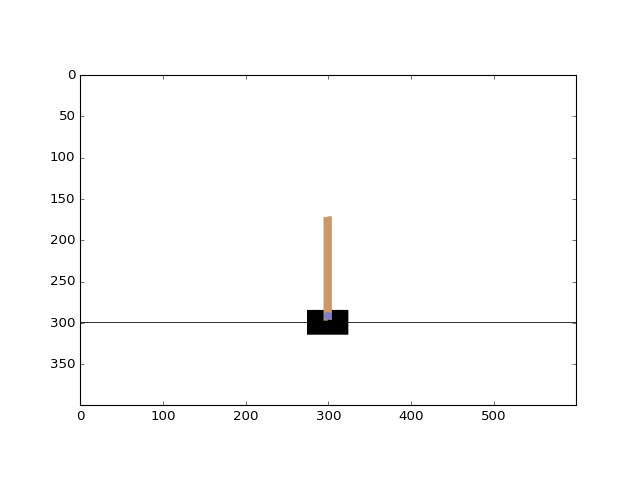

In [2]:
# ---------- Initialise CartePole -------------
env = gym.make('CartPole-v0')

obs = env.reset()
img = env.render(mode='rgb_array')
imshow(img)

In [10]:
# --------------- Parameters -----------------
# Horizontal position, velocity, angle of the pole, angular velocity
obs = env.reset()
obs

array([-0.00570867,  0.01647846, -0.00586921, -0.00306953])

In [11]:
img.shape

(400, 600, 3)

In [12]:
# Actions available for the environment
env.action_space

Discrete(2)

In [13]:
# There are two (2) options:
#    * Accelerate left
#    * Accelerate right

action = 1    # Accelerate right

In [14]:
# --------------- Step forward  -----------------
obs, reward, done, info = env.step(action)
obs

array([-0.0053791 ,  0.21168409, -0.0059306 , -0.29759847])

* `obs` is the new observation
* `reward` is given 1 point at every step, the goal is to keep running as long as possible
* `done` This value will be true when the episode is over
* `info` This dictionary may provide extra debug information in other environments

In [15]:
reward, done, info

(1.0, False, {})

In [16]:
# Slider has moved to the right, pole angle has decreased
img = env.render(mode='rgb_array')
imshow(img)

In [17]:
# --------------- Test Strategy  -----------------
# Accelerate left when pole is leaning left, accelerate
# right when the pole is leaning right

def basic_policy(obs):
    # Unpack observation and state
    h_pos = obs[0]
    vel = obs[1]
    angle = obs[2]
    a_vel = obs[3]

    return 0 if angle < 0 else 1

totals = []
for episode in range(100):
    episode_rewards = 0
    obs = env.reset()
    for step in range(1000): # 1000 steps max
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

print('First 10 Scores:', totals[:10])
print('\nMean:', np.mean(totals), '\n Max:', np.max(totals), '\n Min:', np.min(totals))

First 10 Scores: [36.0, 48.0, 40.0, 41.0, 46.0, 51.0, 25.0, 46.0, 61.0, 46.0]

Mean: 43.48 
 Max: 62.0 
 Min: 24.0


In [18]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [19]:
# Utility function that hides a lot of the heavy lifting
from render_utils import *

%load_ext autoreload
%autoreload 2

In [20]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

In [53]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env, obs, step, action)
    frames.append(img)

    # hard-coded policy
    position, velocity, angle, angular_velocity = obs
    if angle < 0:
        action = 0
    else:
        action = 1

    obs, reward, done, info = env.step(action)
    if done:
        break

<IPython.core.display.Javascript object>


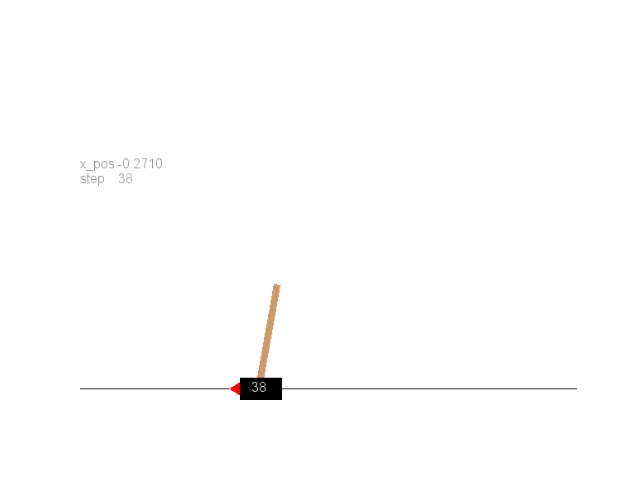

In [56]:
video = plot_animation(frames)
plt.show()